In [0]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.utils.data import TensorDataset
from torch.autograd import Variable
import torch.nn.functional as F

In [0]:
training=pd.read_csv('mnist_train.csv', header = None)
training_set=training.iloc[:,1:].values
label_train=training.iloc[:,0].values
training_set=(training_set)*1./255
training_set = (training_set-0.5)/0.5

tested=pd.read_csv('mnist_test.csv',header = None)
test_set=tested.iloc[:,1:].values
label_test=tested.iloc[:,0].values
test_set=(test_set)*1./255
test_set = (test_set-0.5)/0.5

In [0]:
training_set = torch.FloatTensor(training_set)
label_train=torch.FloatTensor(label_train)

test_set = torch.FloatTensor(test_set)
label_test=torch.FloatTensor(label_test)

In [0]:
train= TensorDataset(training_set,label_train)
test=TensorDataset(test_set,label_test)

In [0]:
training_set_Loader=torch.utils.data.DataLoader(train,batch_size=100,shuffle=True, num_workers=4)
test_set_Loader    =torch.utils.data.DataLoader(test,batch_size=100,shuffle=True, num_workers=4)

In [0]:

#plot
import matplotlib.pyplot as plt
def show_torch_image(torch_tensor):
    plt.imshow(torch_tensor.numpy().reshape(28, 28), cmap='gray')
    plt.show()


In [0]:
# Creating the architecture of the Neural Network
nb_pixels=784
class AutoEncoder(nn.Module):
    def __init__(self, ):
        super(AutoEncoder, self).__init__()
        self.fc1 = nn.Linear(nb_pixels,632)
        self.fc2 = nn.Linear(632,512)
        self.fc3 = nn.Linear(512,396)
        self.fc4 = nn.Linear(396,256)
        #self.fc4 = nn.Linear(256,64)
        #Decoding starts here
        self.fc5 = nn.Linear(256,396)
        self.fc6 = nn.Linear(396,512)
        self.fc7 = nn.Linear(512,632)
        self.fc8 = nn.Linear(632, nb_pixels)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        self.activation3 = nn.LeakyReLU()
        #torch.clamp(0,1) 
    def forward(self, x):
        x = self.activation1(self.fc1(x))
        x = self.activation2(self.fc2(x))
        x = self.activation2(self.fc3(x))
        x = self.activation2(self.fc4(x))
        x = self.activation2(self.fc5(x))
        x = self.activation2(self.fc6(x))
        x = self.activation2(self.fc7(x))
        x = self.fc8(x)
        
        
        return x
vae = AutoEncoder()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vae.parameters(), lr = 0.001, weight_decay = 0.5)



In [0]:
# Creating the architecture of the Neural Network
nb_pixels=784
class AutoEncoder(nn.Module):
    def __init__(self, ):
        super(AutoEncoder, self).__init__()
        self.fc1 = nn.Linear(nb_pixels,632)
        self.fc2 = nn.Linear(632,512)
        self.fc3 = nn.Linear(512,396)
        self.fc4 = nn.Linear(396,256)
        #self.fc4 = nn.Linear(256,64)
        #Decoding starts here
        self.fc5 = nn.Linear(256,396)
        self.fc6 = nn.Linear(396,512)
        self.fc7 = nn.Linear(512,632)
        self.fc8 = nn.Linear(632, nb_pixels)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Sigmoid()
        self.activation3 = nn.LeakyReLU()
        #torch.clamp(0,1) 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
        x = torch.sigmoid(self.fc7(x))
        x = self.fc8(x)
        
        
        return x
vae = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(vae.parameters(), lr = 0.001)



In [0]:
nb_epoch = 100

for epoch in range(1, nb_epoch + 1):
    s = 0
    for batch_no, (actual,target) in enumerate(training_set_Loader):
       
        actual = Variable(actual)         
        output = vae(actual)
        optimizer.zero_grad()      
        loss = criterion(output,actual)
        loss.backward()
        s += 1
        optimizer.step()
        if(s%6000==0):
          print(s)
    print('epoch: '+str(epoch)+'/'+str(nb_epoch)+' loss: '+str(loss.item()))



In [0]:
#print(training_set_Loader)

In [0]:

s=0
vae.eval()
predicted=[]
for batch_no, (actual,target) in enumerate(test_set_Loader):
       
  input_to_autoencoder = Variable(actual)       
  output = vae(input_to_autoencoder)
  #print(output.size())
  
  for x in output:
    predicted.append(x)
  
  loss = criterion(output,input_to_autoencoder)
  loss.backward()
  s+=1        
  #if(s%6000==0):
   # print(s)
  print('EntryNo: '+str(s)+ ' loss: '+str(loss.item()))


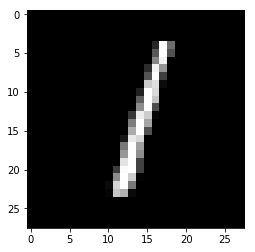

In [0]:

show_torch_image(test_set[2])

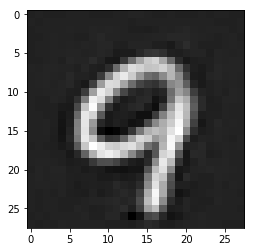

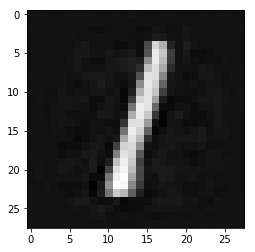

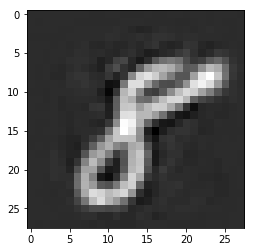

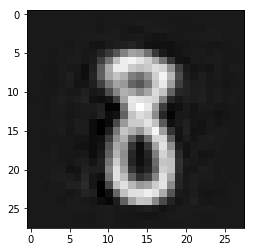

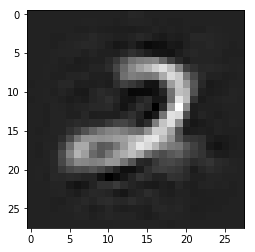

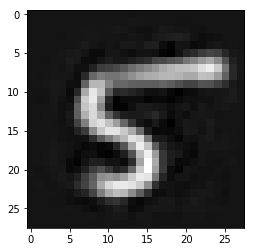

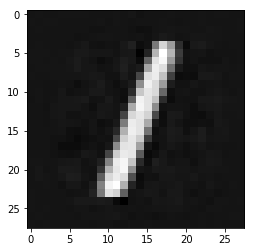

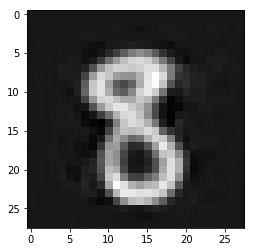

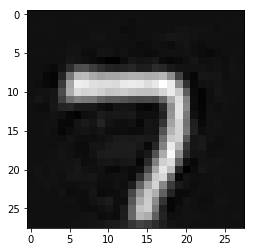

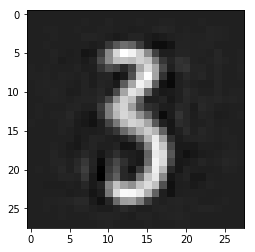

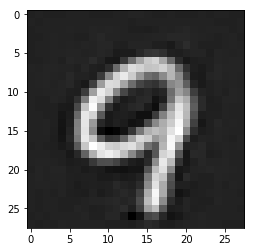

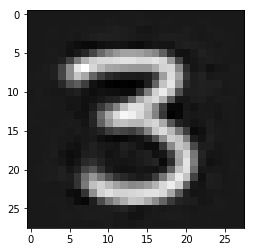

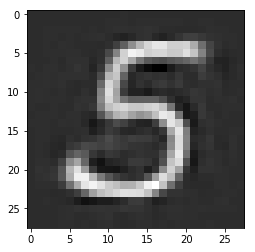

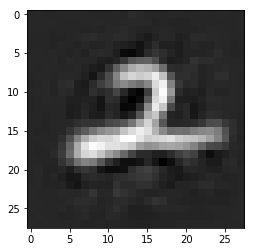

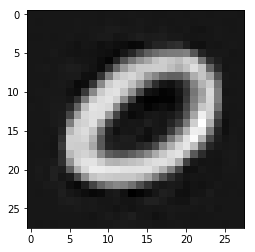

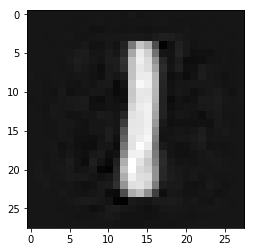

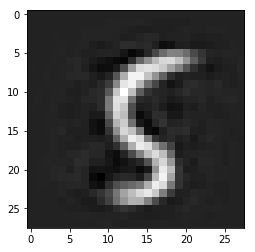

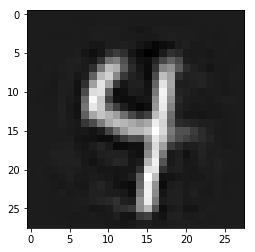

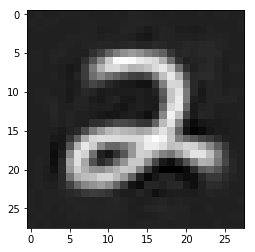

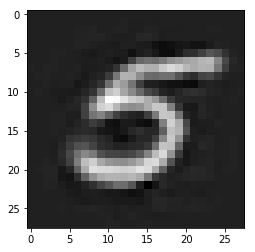

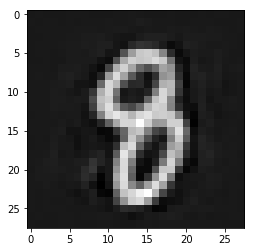

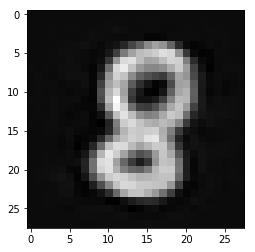

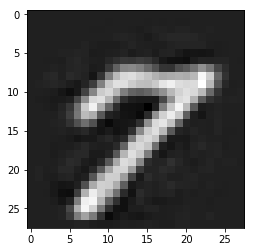

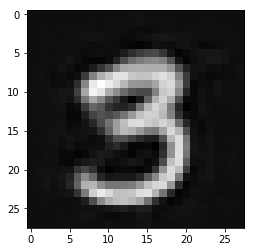

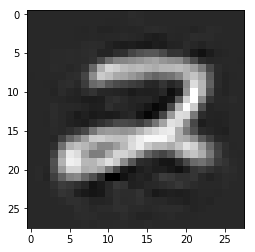

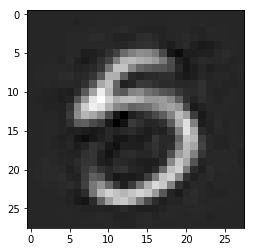

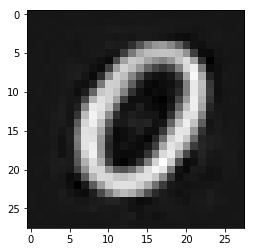

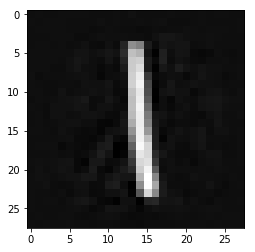

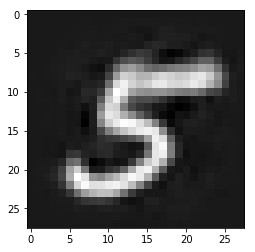

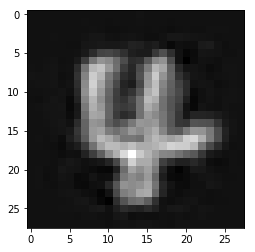

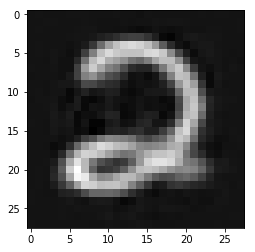

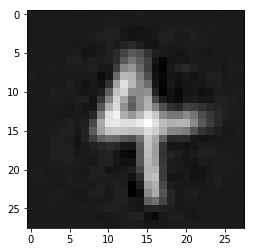

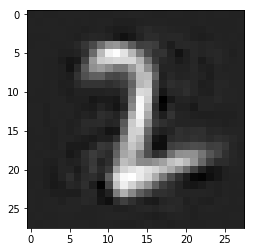

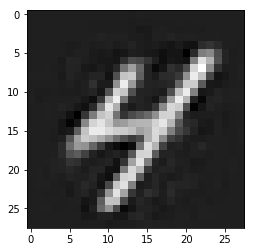

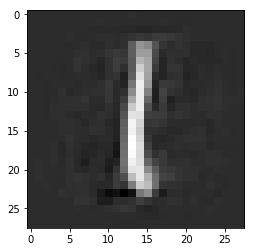

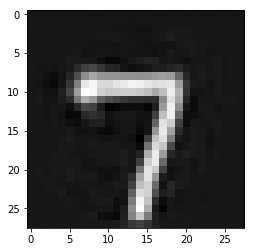

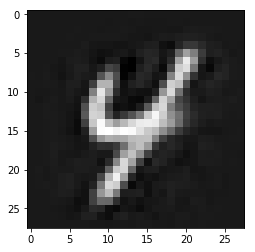

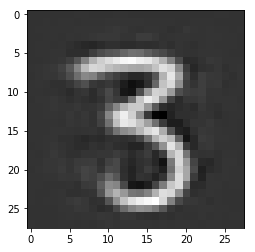

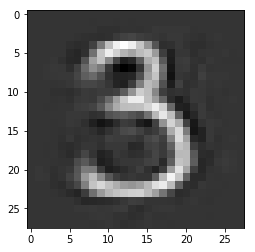

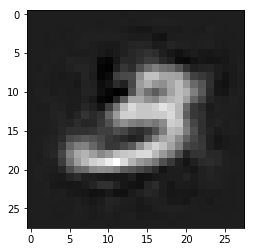

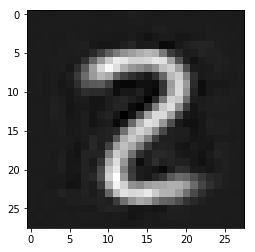

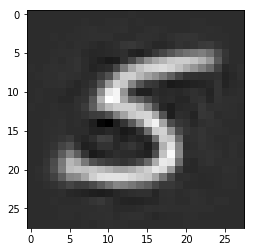

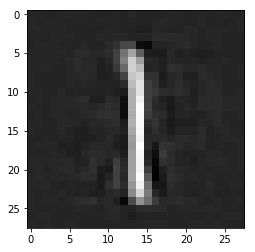

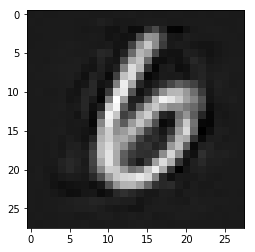

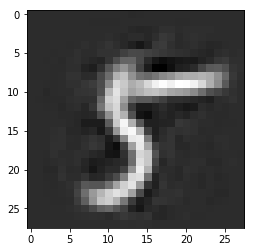

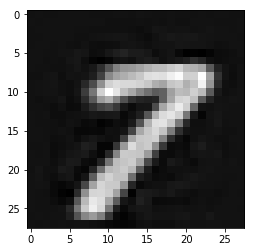

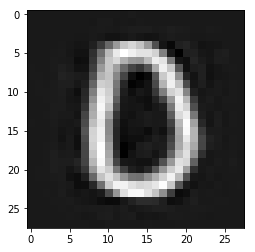

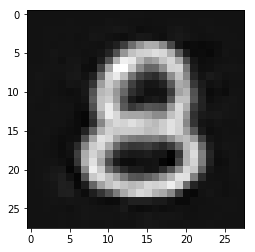

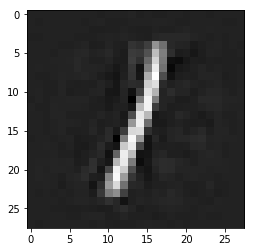

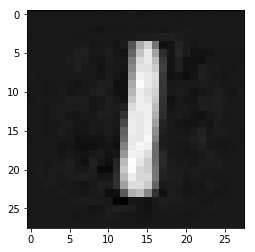

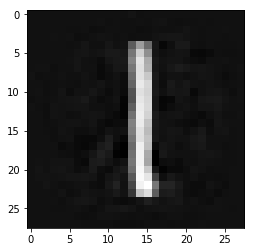

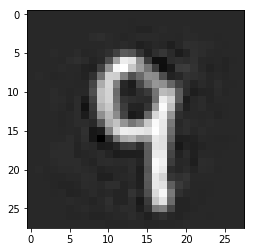

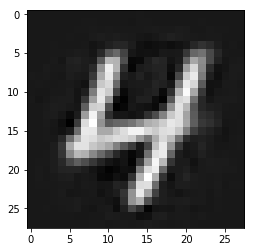

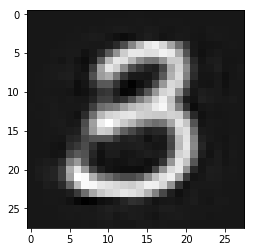

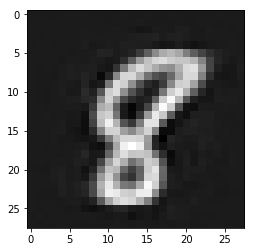

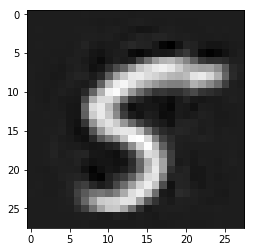

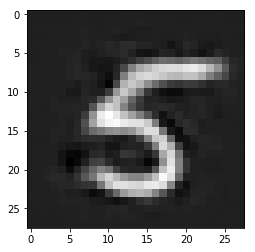

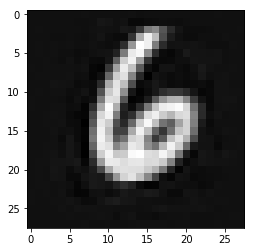

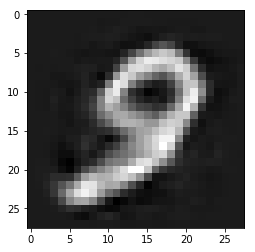

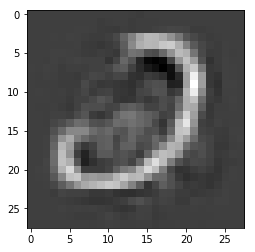

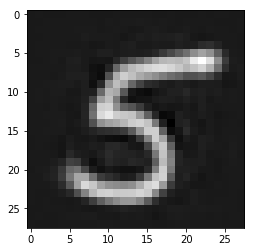

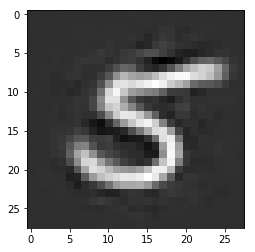

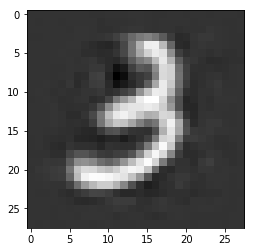

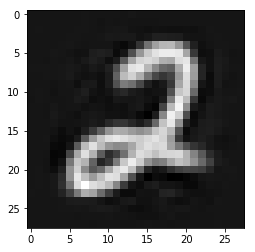

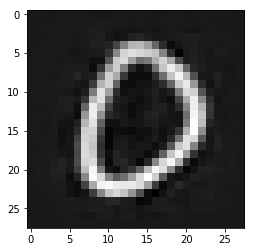

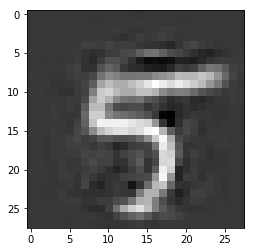

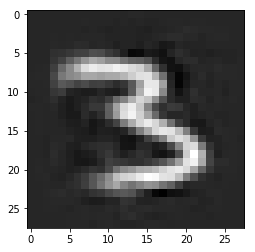

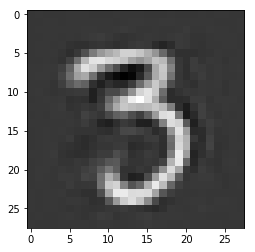

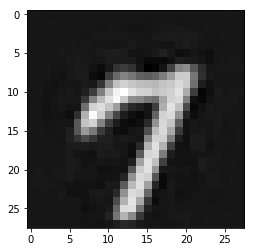

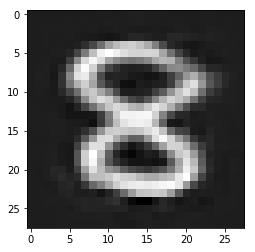

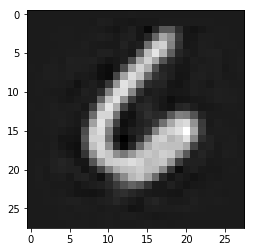

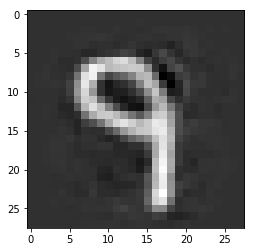

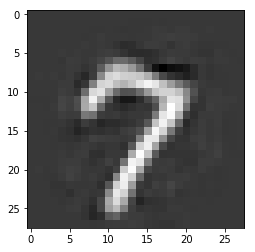

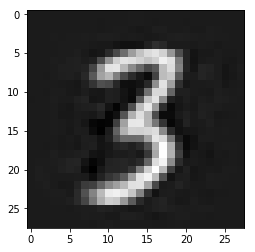

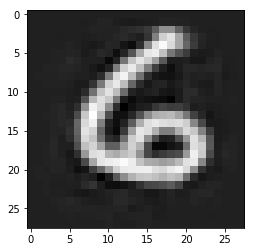

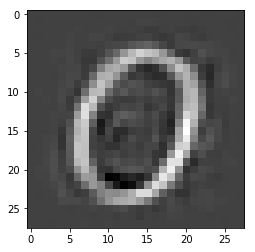

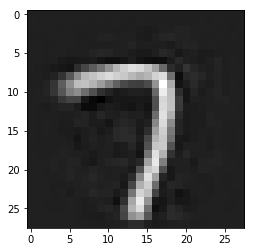

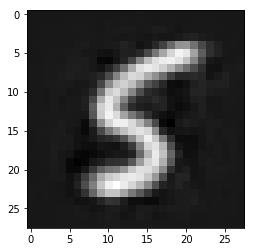

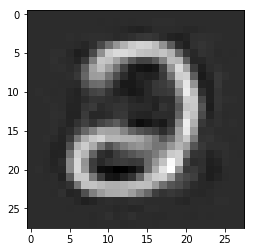

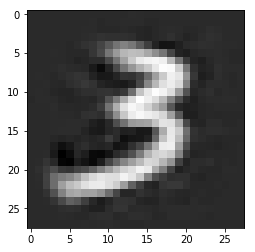

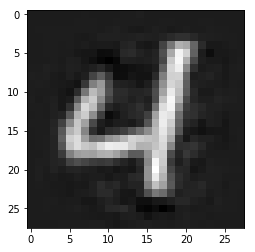

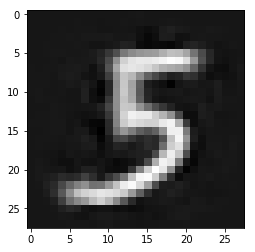

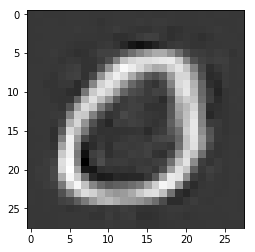

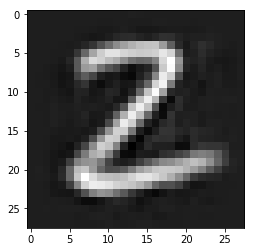

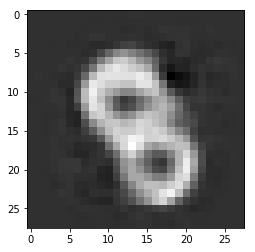

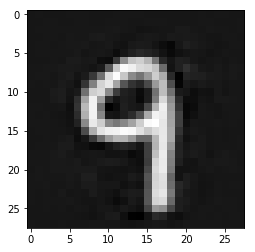

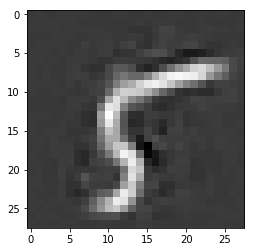

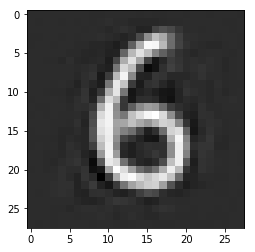

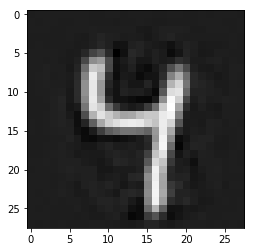

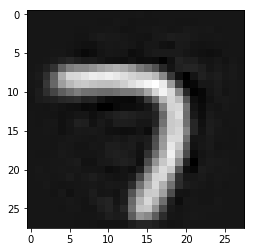

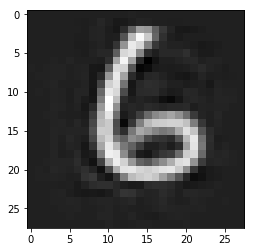

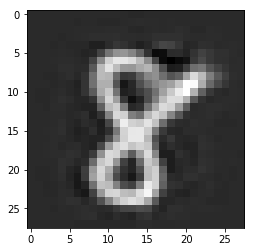

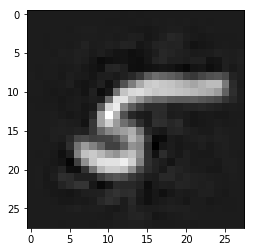

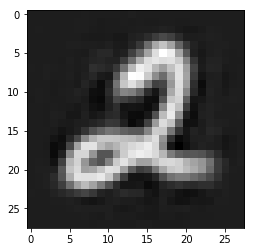

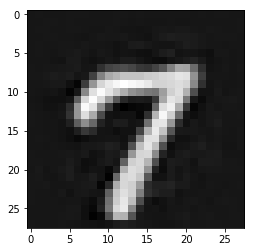

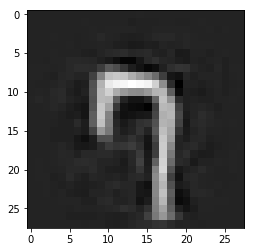

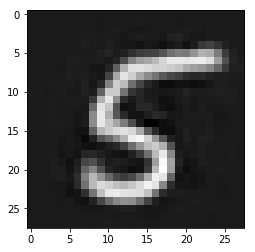

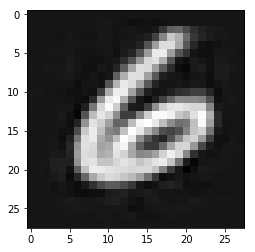

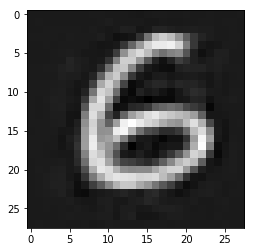

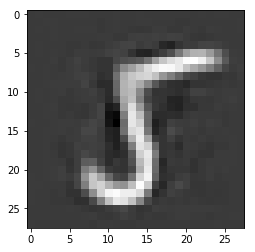

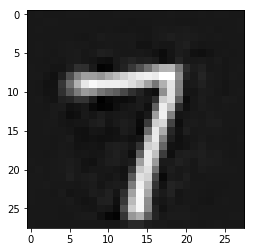

In [0]:


show_torch_image(predicted[9].detach())
for x in range(100):
  show_torch_image(predicted[x].detach())